In [1]:
# Apriori 알고리즘
from mlxtend.frequent_patterns import apriori, association_rules
# 연관분석용 데이터 파일 변환
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 장바구니 데이터
tran = [['A', 'B', 'C', 'D', 'E'],
        ['B', 'C'],
        ['A', 'B', 'F'],
        ['A', 'B', 'G'],
        ['A', 'F', 'H']]

In [3]:
# 데이터 세트를 연관분석이 가능한 배열로 변환
te = TransactionEncoder()
tran_ar = te.fit(tran).fit_transform(tran)
print(tran_ar)
# 열이름
print('', te.columns_)

[[ True  True  True  True  True False False False]
 [False  True  True False False False False False]
 [ True  True False False False  True False False]
 [ True  True False False False False  True False]
 [ True False False False False  True False  True]]
 ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']


In [4]:
# 데이터 프레임으로 변환
df = pd.DataFrame(tran_ar, columns=te.columns_)
print(df)

       A      B      C      D      E      F      G      H
0   True   True   True   True   True  False  False  False
1  False   True   True  False  False  False  False  False
2   True   True  False  False  False   True  False  False
3   True   True  False  False  False  False   True  False
4   True  False  False  False  False   True  False   True


In [5]:
# 각 상품별 거래 빈도
freq = df.sum().to_frame('Frequency')
# 빈도 역순으로 정렬
freq_sort = freq.sort_values('Frequency', ascending=False)
print(freq_sort)

   Frequency
A          4
B          4
C          2
F          2
D          1
E          1
G          1
H          1


In [6]:
# 지지도
freq_sort['Support'] = freq_sort['Frequency'] / len(freq_sort)
print(freq_sort)

   Frequency  Support
A          4    0.500
B          4    0.500
C          2    0.250
F          2    0.250
D          1    0.125
E          1    0.125
G          1    0.125
H          1    0.125


<Axes: title={'center': 'Frequent Items'}>

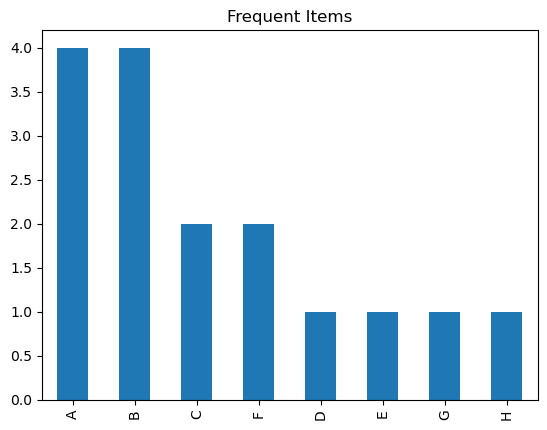

In [7]:
# 상품 아이템별 거래 빈도
freq_sort['Frequency'].plot(kind='bar', title="Frequent Items")

<Axes: >

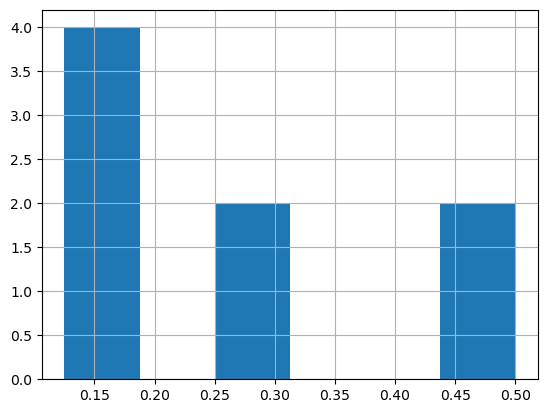

In [8]:
# 상품 아이템 지지도의 히스토그램
freq_sort['Support'].hist(bins=6)

In [9]:
# 반발항목과 지지도
freq_items = apriori(df, min_support=0.4, use_colnames=True)
print(freq_items)

   support itemsets
0      0.8      (A)
1      0.8      (B)
2      0.4      (C)
3      0.4      (F)
4      0.6   (B, A)
5      0.4   (F, A)
6      0.4   (C, B)


In [10]:
# 연관규칙
rules = association_rules(freq_items, metric="confidence", min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(B),(A),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8,-0.250000
1,(A),(B),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8,-0.250000
2,(F),(A),0.4,0.8,0.4,1.00,1.2500,0.08,inf,0.333333
3,(C),(B),0.4,0.8,0.4,1.00,1.2500,0.08,inf,0.333333


In [11]:
# 리프트가 1보다 큰 규칙
rules - rules[(rules['lift']>1)]
# 신뢰도 기준으로 내림차순 정렬
rules.sort_values(by='confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2,(F),(A),0.4,0.8,0.4,1.00,1.2500,0.08,inf,0.333333
3,(C),(B),0.4,0.8,0.4,1.00,1.2500,0.08,inf,0.333333
0,(B),(A),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8,-0.250000
1,(A),(B),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8,-0.250000


In [12]:
# 조건부에 'F'가 있는 규칙
rules[rules.antecedents.apply(lambda x: 'F' in x)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2,(F),(A),0.4,0.8,0.4,1.0,1.25,0.08,inf,0.333333


In [13]:
# 조건부에 'B'가 있는 규칙
rules[rules.antecedents.apply(lambda x: 'B' in x)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(B),(A),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8,-0.25
